# Implentation of the graph

- Inicializar el grafo vacio NetworkX
- Crear un nodo. Para inicializar ese nodo buscamos en google (Primer resultado)
- N engines (computacion en paralelo) que busquen en los links
- Filtros URLs, Filtros Organizaciones (Revisar) - GPT2 (Clustering)
- Criterio de parada del agente.
- https://spacy.io/api/entityrecognizer


In [32]:
# Connection libraries.
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
#from langdetect import detect
import re
import hashlib
import time
import langdetect

import spacy
import es_core_news_sm
import en_core_web_sm
import networkx as nx

In [33]:
# Import class TheWitness (webscraper)
%run ./TheWitness.ipynb

# Import class Node 
%run ./Website.ipynb

#Import text clustering model
%run ./text_clustering_final.ipynb

## Initialize the graph.

In [34]:
# Initialize graph.
G = nx.Graph()

# Max distance from root.
max_distance_from_root = 2

### An brief example of the algorithm.

In [35]:
def addNode(graph, result):
    website=Website(result[0], result[1],result[2],result[3],result[4], result[5],result[6], result[7],result[8],result[9],
                    result[10], result[11],result[12], result[13],result[14],result[15])
    graph.add_node(website)
    print("Node added")
    return len(list(graph.nodes))

In [36]:
def addEdge(graph, node1, node2):
    graph.add_edge(node1, node2)
    return(len(list(graph.nodes)))

In [37]:
def searchable_url(hostname):
    return "https://" + hostname

In [38]:
def get_text_(hostname):
    result = requests.get(hostname)
    src = result.content
    soup = BeautifulSoup(src, 'html.parser')
    for script in soup(["script", "style"]):                   
            script.decompose()
    text = soup.get_text().replace("\n"," ")
    text = re.sub('\s+',' ',text)
    
    return text

In [39]:
final_nodes_urls = []
def is_node_useful(possible_nodes, treshold=0.6):
    final_nodes = []
    for possible_node in possible_nodes:
        
        text = get_text_(possible_node)
        is_useful = cluster_text(text, treshold)
#         if is_useful != -1 and possible_node not in final_nodes_urls:
        if is_useful != -1:
            final_nodes.append(possible_node)
        
#         final_nodes_urls += final_nodes
    return final_nodes

In [40]:
def nodes_already_seen(possible_nodes):
    final_list = []
    for possible_node in possibles_nodes:
        if possible_node in final_nodes_urls:
            final_list.append(possible_node)
    return final_list

In [41]:
def index_of_node(graph, node):
    graph_list = list(graph)
    index = graph_list.index(node)
    return index

In [42]:
# def explore(graph, predecesor_node_url, node_url, prev_witness)
#     if prev_witness.getDistance() > 3:
#         pass
#     else:
#         for node in toVisit_nodes:
#             witness = TheWitness(predecesor_node_url, node_url, index_of_node(graph, node_url), witness.getDistance()+1)
#             result = witness.scrap()
#             addNode(graph, result)
#             addEdge(graph, predecesor_node, node)

#             for granchild_node in result[4]:
#                 explore(graph, node, distance_from_root + 1, )

In [43]:
def explore(node, witness):
    d=witness.getDistance()
    if d<3:
        useful_nodes = is_node_useful(node.getUrls())
        for n in useful_nodes:
            w=TheWitness(node.getUrl(), n, d+1, d+1)
            result = w.scrap()
            node_pos=addNode(G, result)-1
            node1=list(G.nodes)[node_pos]
            addEdge(G, node, node1)
            del witness
            explore(node1, w)

In [44]:
roots_indices = []
def explore_root(root_url):
    global roots_indices

    witness_root = TheWitness(root_url, root_url, 0, 0)
    result_root = witness_root.scrap()
    node_root_pos = addNode(G,result_root)-1
    roots_indices.append(node_root_pos)
    if len(roots_indices) > 1:
        root_curr = list(G.nodes())[roots_indices[len(roots_indices)-1]]
        root_prev = list(G.nodes())[roots_indices[len(roots_indices)-2]]
        addEdge(G, root_curr, root_prev)

    node_root = list(G.nodes)[node_root_pos]
    print("--------Root created-------------")
    try:
        explore(node_root, witness_root)
    except:
        pass

In [45]:
def final_algorithm(roots_list):
    global G
    G = nx.Graph()
    for root in roots_list:
        explore_root(root)
    return G

In [46]:
list_ = ["a","b"]
index= list_.index("b")
index

1

In [48]:
roots_list = ["https://es.sexcam-shows.com/", 
              "https://chaturbate.com.br/", 
              "https://revistas.unilibre.edu.co/index.php/rc_salud_ocupa/article/view/5128", 
              "https://www.gq.com.mx/cuidado-personal/articulo/sexcam-el-arte-de-erotizar-a-traves-de-una-webcam", 
              "https://es.pornhub.com/video/search?search=sexcam", 
              "https://www.ardienteplacer.com/sexcam",
              "https://www.pasion.com/webcam-sexcam-eroticas/",
              "https://www.computrabajo.com.co/empleos-en-bogota-dc",
              "https://www.elempleo.com/co/",
              "https://www.elempleo.com/co/ofertas-empleo/bogota",
              "https://clasificados.eltiempo.com/ofertas-empleos/bogota/",
              "https://co.indeed.com/",
              "https://co.indeed.com/Empleos-en-Bogot%C3%A1,-Cundinamarca",
              "https://co.jooble.org/trabajo/Bogot%C3%A1%2C-D.C.?main",
              "https://www.serviciodeempleo.gov.co/",
              "https://bogota.gov.co/servicios/empleo",
              "https://co.mileroticos.com/escorts/bogota/",
              "https://www.photoprepagos.com/prepagos/bogota",
              "https://co.skokka.com/escorts/bogota/",
              "https://prepagos69.com/bogota/prepagos",
              "https://pasionprepagos.com/escorts/bogota",
              "https://www.elsilencio.co/",
              "https://escortsbogota.co/",
              "https://lacelestina.co/profiles/ubicacion/Bogota",
              "https://co.mundosexanuncio.com/prepagos-y-putas-en-bogota-d-c-departamento",
              "https://chicasyescorts.com.co/escorts-bogota/",
              "https://es.wikipedia.org/wiki/Trata_de_personas#:~:text=La%20trata%20de%20personas%2C%20comercio,el%20bienestar%20del%20ser%20humano.",
              "https://www.acnur.org/trata-y-trafico-de-personas.html",
              "https://www.unodc.org/toc/es/crimes/human-trafficking.html",
              "https://www.unodc.org/documents/human-trafficking/HT_GPATleaflet07_es.pdf",
              "https://www.interpol.int/es/Delitos/Trata-de-personas/Tipos-de-trata-de-personas",
              "https://www.interpol.int/es/Delitos/Trata-de-personas",
              "https://ayudaenaccion.org/ong/blog/derechos-humanos/diferencias-trata-y-trafico-de-personas/",
              "https://www.un.org/es/observances/end-human-trafficking-day",
              "https://www.ohchr.org/SP/Issues/Women/WRGS/Pages/Trafficking.aspx",
              "https://stockmodels.com.co/",
              "https://www.modelmanagement.com/es/model-agencies/colombia-CO/"
              "https://www.studiomodelsfashion.com/",
              "https://www.bogotamiciudad.com/directoriodebogota/economia/209-383-385/bogota/modelos",
              "https://www.lhmodels.com/2018/01/agencias-de-modelaje-bogota.html",
              "https://modelosyartistas.com/",
              "https://www.burestudios.com/"
             ]

In [ ]:
final_algorithm(roots_list)
G

Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
Node added
Node added
--------Root created-------------


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Node added


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Node added
Node added
--------Root created-------------


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Node added
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
Node added
Node added
Node added
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
Node added
--------Root created-------------
Node added
--------Root created-------------
Node added
Node added
--------Root crea

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Node added
Node added
Node added
--------Root created-------------


In [ ]:
nodes = list(G.nodes())
nodes[2].getUrl()

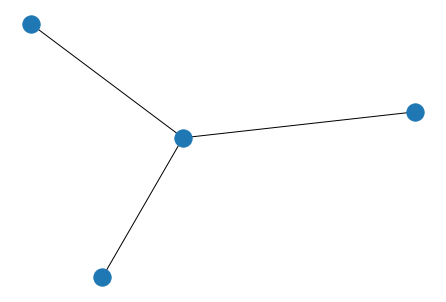

In [19]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=False, font_weight='bold')

In [26]:
import pickle
pickle.dump(G, open('graph.txt', 'w'))

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
graph_loaded = nx.read_gpickle("test.gpickle")
graph_loaded

In [22]:
list(G.nodes())[0].score()

AttributeError: 'Website' object has no attribute 'score'

In [87]:
# For link in links.
def explore_network(result):
    
    count = 1
    for link in result[2]: 

        
        # We already explored this website.
        try: 
            if hashes_map[link]: 
                pass

        # New website!
        except:
            
            navegable = True
            for website in omit_pages: 
                if link.find(website) != -1: 
                    navegable = False
                    

            if navegable: 
                root = "https://modelosalacarta.com/"
                destination = link
                hash_destination = nodeID(destination)
                distance_from_root = 1
                #hashes_map[destination] = True

                witness = TheWitness(
                    root, 
                    destination, 
                    hash_destination, 
                    distance_from_root
                )
                result = witness.scrap()
                
                print("---------------")
                print("Agent No.", count)
                print(result)
                print("---------------")
                
                del witness
                
        count += 1


# Define functions.

"""
This functions return de node's hash.
"""
def getNodeHash(url): 
    websiteHash = hashlib.sha256()
    websiteHash.update(url.encode())
    return websiteHash.hexdigest()


"""
This function add a new node to the global graph.
"""
def addNodeToGraph(website_info):
    
    # This indicates python that we will use a global variable defined previously.
    global G
    
    # Extract the Website info.
    website = Website(
        ID = website_info[0], 
        url = website_info[1],
        content_type = website_info[2],
        language = website_info[3],
        urls = website_info[4],
        social_networks_urls = website_info[5],
        text = website_info[6], 
        names = website_info[7],
        locations = website_info[8],
        iframes = website_info[9],
        organizations = website_info[10], 
        dates = website_info[11],
        phonenumbers = website_info[12], 
        images_urls = website_info[13],
        payment_accounts = website_info[14],
        emails = website_info[15]
    )
    
    # Add website to the graph.
    G.add_node(website)
    
    # Returns the website.
    return website

"""
Once the first witness has explored the root, released more witnesses!
"""
def exploreGraph(website, root_witness):
    
    global max_distance_from_root
    
    # If agent is not to far from the initial root website of the explotation.
    if root_witness.getDistance() <= max_distance_from_root:
    
        # For every url in the website.
        for destination_url in website.getUrls():

            # Initialize a new witness.
            new_witness = TheWitness(
                            origin_url = website.getUrl(), 
                            destination_url = destination_url, 
                            destination_hash = getNodeHash(destination_url), 
                            root_witness.getDistance() + 1
                      )
            
            # Try to scrap this website!
            try:
                result = new_witness.scrap()
                
                # If this website was interesting.
                if result != -1:
                    
                    # Get new website.
                    new_website = addNodeToGraph(result)
                    
                    # Explore the finding of the new witness.
                    exploreGraph(new_website, new_witness)
                    
                # This website is not interesting.
                else: 
                    pass
            
            # Some error arise when exploring this website: delete the witness.
            except:
                pass
                
            # Delete the witness.
            del new_witness

SyntaxError: positional argument follows keyword argument (<ipython-input-87-0100589796c9>, line 64)